In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [11]:
!pip install psycopg2

  Preparing metadata (setup.py) ... done
  Created wheel for psycopg2: filename=psycopg2-2.9.10-cp312-cp312-macosx_11_0_arm64.whl size=133407 sha256=59b5d8c44940feacf98afcc5aef97dd1426cc0a060bc53553ed1b628d66f2845
  Stored in directory: /Users/raghavkumar/Library/Caches/pip/wheels/ac/bb/ce/afa589c50b6004d3a06fc691e71bd09c9bd5f01e5921e5329b
Successfully built psycopg2


In [73]:
!pip install clickhouse-connect

In [89]:
# from sqlalchemy import create_engine
# from clickhouse_driver import Client

# # Database connection parameters
# db_config = {
#     'host': '10.3.155.14',
#     'port': 9000,  # Update with your port number
#     'dbname': 'atlas_dev',
#     'user': 'atlas_driver_offer_bpp_user'
# }

# clickhouse_config = {
#     'host': '10.3.155.14',
#     'port': 9000,  # Update with your port number
#     'dbname': 'atlas_dev',
#     'user': 'atlas_driver_offer_bpp_user'
# }

# def connect_db (db_config):
#   return create_engine(f"postgresql+psycopg2://{db_config['user']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}")

# def connect_clickhouse (clickhouse_config):
#   return Client(host=clickhouse_config['host'], port=clickhouse_config['port'], user=clickhouse_config['user'], database=clickhouse_config['dbname'])   

# def load_db_data(engine, schema, table_name):
#     """
#     Load data from a PostgreSQL table into a pandas DataFrame.

#     Args:
#     schema (str): Schema of the PostgreSQL table.
#     table_name (str): Name of the PostgreSQL table to load data from.

#     Returns:
#     pd.DataFrame: DataFrame containing data from the specified table.
#     """
#     full_table_name = f"{schema}.{table_name}"
#     query = f"SELECT * FROM {full_table_name}"
#     df = pd.read_sql(query, engine)
#     return df

## Getting driver data from metabase

In [259]:
import clickhouse_connect

client = clickhouse_connect.get_client(
    host='10.6.155.14',
    port=8123,
    username='default'
)

In [313]:
%%time

result = client.query_df('SELECT * FROM atlas_kafka.driver_eda_kafka LIMIT 5000000')
result

CPU times: user 21.7 s, sys: 2.38 s, total: 24.1 s
Wall time: 55.5 s


,driver_id,rid,ts,lat,lon,mid,updated_at,created_at,on_ride,active,...,mode,acc,rideStatus,st,speed,mocid,vehicle_variant,is_stop_detected,stop_lat,stop_lon
0,0001cd1f-d316-4005-9115-4dc6eb30c28e,,2024-12-13 16:34:05.062,12.8910382,74.9483467,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,2.2829999923706055,IDLE,2024-12-13 16:34:05,7.641946,5d660aa7-14ee-443e-a860-82348312c1fe,AUTO_RICKSHAW,0,0.0,0.0
1,0001cd1f-d316-4005-9115-4dc6eb30c28e,,2024-12-13 16:34:26.065,12.8894872,74.9484455,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,2.049999952316284,IDLE,2024-12-13 16:34:20,8.780102,5d660aa7-14ee-443e-a860-82348312c1fe,AUTO_RICKSHAW,0,0.0,0.0
2,0001cd1f-d316-4005-9115-4dc6eb30c28e,,2024-12-13 16:34:46.053,12.8883945,74.9493124,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,2.433000087738037,IDLE,2024-12-13 16:34:44,5.699955,5d660aa7-14ee-443e-a860-82348312c1fe,AUTO_RICKSHAW,0,0.0,0.0
3,0001cd1f-d316-4005-9115-4dc6eb30c28e,,2024-12-13 16:34:51.069,12.8884428,74.9495597,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,2.359999895095825,IDLE,2024-12-13 16:34:44,5.329684,5d660aa7-14ee-443e-a860-82348312c1fe,AUTO_RICKSHAW,0,0.0,0.0
4,0001cd1f-d316-4005-9115-4dc6eb30c28e,,2024-12-13 16:35:06.071,12.8879555,74.9497272,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,2.263000011444092,IDLE,2024-12-13 16:35:20,6.840510,5d660aa7-14ee-443e-a860-82348312c1fe,AUTO_RICKSHAW,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,00f0a048-1f91-4ceb-90bb-1811b9c39299,,2024-11-11 08:42:22.307,13.0125866,80.2283895,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,20.44300079345703,IDLE,2024-11-11 08:42:41,0.000000,4a95be1d-9052-4715-8cf5-ea8f68ffc85a,AUTO_RICKSHAW,0,0.0,0.0
4999996,00f0a048-1f91-4ceb-90bb-1811b9c39299,,2024-11-11 08:42:52.310,13.0126252,80.228392,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,23.368000030517575,IDLE,2024-11-11 08:43:00,0.000000,4a95be1d-9052-4715-8cf5-ea8f68ffc85a,AUTO_RICKSHAW,0,0.0,0.0
4999997,00f0a048-1f91-4ceb-90bb-1811b9c39299,,2024-11-11 08:43:22.416,13.0126683,80.2283991,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,23.834999084472656,IDLE,2024-11-11 08:43:39,0.000000,4a95be1d-9052-4715-8cf5-ea8f68ffc85a,AUTO_RICKSHAW,0,0.0,0.0
4999998,00f0a048-1f91-4ceb-90bb-1811b9c39299,,2024-11-11 08:44:48.584,13.0125831,80.2284159,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,25.277000427246097,IDLE,2024-11-11 08:44:56,0.000000,4a95be1d-9052-4715-8cf5-ea8f68ffc85a,AUTO_RICKSHAW,0,0.0,0.0


In [314]:
result.columns

Index(['driver_id', 'rid', 'ts', 'lat', 'lon', 'mid', 'updated_at',
       'created_at', 'on_ride', 'active', 'partition_date', 'date', 'mode',
       'acc', 'rideStatus', 'st', 'speed', 'mocid', 'vehicle_variant',
       'is_stop_detected', 'stop_lat', 'stop_lon'],
      dtype='object')

In [315]:
df = result.copy()

In [316]:
df[['lat', 'lon', 'on_ride']] = df[['lat', 'lon', 'on_ride']].apply(pd.to_numeric)

In [317]:
df_ranged = df.loc[(df['on_ride'] == 1) & (df['lat'] <= 13.2) & (df['lat'] >= 12.8) & (df['lon'] >= 77.3) & (df['lon'] <= 77.7) & (df['rideStatus'] != 'IDLE')]
df_ranged  # Ranged to the polyline used later

,driver_id,rid,ts,lat,lon,mid,updated_at,created_at,on_ride,active,...,mode,acc,rideStatus,st,speed,mocid,vehicle_variant,is_stop_detected,stop_lat,stop_lon
2945,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:22.975,12.891228,77.56122,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,1.315999984741211,ON_PICKUP,2024-12-13 03:42:18,0.000000,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
2946,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:43.337,12.891248,77.561188,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,2.616999864578247,ON_PICKUP,2024-12-13 03:42:42,0.000000,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
2947,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:44.982,12.891257,77.561183,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,2.0329999923706055,ON_PICKUP,2024-12-13 03:42:49,0.128452,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
2948,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:50.982,12.891268,77.561129,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,1.8910000324249268,ON_PICKUP,2024-12-13 03:42:49,2.331645,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
2949,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:52.982,12.891299,77.561059,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,1.600000023841858,ON_PICKUP,2024-12-13 03:42:49,4.370125,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991901,0339339d-5600-4f0d-ac69-0a6fe3473c80,accac23d-c355-4485-a4b3-73a9848f6969,2024-10-11 07:08:45.928,12.9743,77.596059,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,3.7899999618530273,ON_RIDE,2024-10-11 07:08:49,8.979882,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,<NA>,NaN,NaN
4991902,0339339d-5600-4f0d-ac69-0a6fe3473c80,accac23d-c355-4485-a4b3-73a9848f6969,2024-10-11 07:08:54.930,12.974826,77.596679,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,3.7899999618530273,ON_RIDE,2024-10-11 07:08:49,10.309949,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,<NA>,NaN,NaN
4991903,0339339d-5600-4f0d-ac69-0a6fe3473c80,accac23d-c355-4485-a4b3-73a9848f6969,2024-10-11 07:09:03.931,12.975354,77.597417,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,3.7899999618530273,ON_RIDE,2024-10-11 07:08:58,10.980419,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,<NA>,NaN,NaN
4991904,0339339d-5600-4f0d-ac69-0a6fe3473c80,accac23d-c355-4485-a4b3-73a9848f6969,2024-10-11 07:09:12.931,12.975788,77.597931,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,3.875999927520752,ON_RIDE,2024-10-11 07:09:05,2.574651,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,<NA>,NaN,NaN


In [318]:
df_ranged.drop(columns=['updated_at', 'created_at'])

,driver_id,rid,ts,lat,lon,mid,on_ride,active,partition_date,date,mode,acc,rideStatus,st,speed,mocid,vehicle_variant,is_stop_detected,stop_lat,stop_lon
2945,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:22.975,12.891228,77.56122,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-12-13,2024-12-13 03:42:18,ONLINE,1.315999984741211,ON_PICKUP,2024-12-13 03:42:18,0.000000,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
2946,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:43.337,12.891248,77.561188,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-12-13,2024-12-13 03:42:42,ONLINE,2.616999864578247,ON_PICKUP,2024-12-13 03:42:42,0.000000,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
2947,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:44.982,12.891257,77.561183,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-12-13,2024-12-13 03:42:49,ONLINE,2.0329999923706055,ON_PICKUP,2024-12-13 03:42:49,0.128452,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
2948,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:50.982,12.891268,77.561129,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-12-13,2024-12-13 03:42:49,ONLINE,1.8910000324249268,ON_PICKUP,2024-12-13 03:42:49,2.331645,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
2949,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:52.982,12.891299,77.561059,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-12-13,2024-12-13 03:42:49,ONLINE,1.600000023841858,ON_PICKUP,2024-12-13 03:42:49,4.370125,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991901,0339339d-5600-4f0d-ac69-0a6fe3473c80,accac23d-c355-4485-a4b3-73a9848f6969,2024-10-11 07:08:45.928,12.9743,77.596059,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-10-11,2024-10-11 07:08:49,ONLINE,3.7899999618530273,ON_RIDE,2024-10-11 07:08:49,8.979882,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,<NA>,NaN,NaN
4991902,0339339d-5600-4f0d-ac69-0a6fe3473c80,accac23d-c355-4485-a4b3-73a9848f6969,2024-10-11 07:08:54.930,12.974826,77.596679,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-10-11,2024-10-11 07:08:49,ONLINE,3.7899999618530273,ON_RIDE,2024-10-11 07:08:49,10.309949,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,<NA>,NaN,NaN
4991903,0339339d-5600-4f0d-ac69-0a6fe3473c80,accac23d-c355-4485-a4b3-73a9848f6969,2024-10-11 07:09:03.931,12.975354,77.597417,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-10-11,2024-10-11 07:08:58,ONLINE,3.7899999618530273,ON_RIDE,2024-10-11 07:08:58,10.980419,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,<NA>,NaN,NaN
4991904,0339339d-5600-4f0d-ac69-0a6fe3473c80,accac23d-c355-4485-a4b3-73a9848f6969,2024-10-11 07:09:12.931,12.975788,77.597931,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-10-11,2024-10-11 07:09:05,ONLINE,3.875999927520752,ON_RIDE,2024-10-11 07:09:05,2.574651,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,<NA>,NaN,NaN


## Snap to polyline

Got polyline from the google sheet

In [60]:
import polyline as pl

In [192]:
coords = pl.decode(r'olrnAkfqxMuZtdBDpC??FlC??D`BBhA??@J?H???^??DtADjA??Bj@??Dp@~Cf[vO|V????@f@??@R?~C??@bB???pAAjA?nACf@Er@Ev@Gp@Ah@??E\??C\??K|@QjBKdAGz@??Gj@?p@@RFZEz@??Ff@??Hd@??FZ??BV@F??Pv@??F\f@vB??^bBR~@Jb@??Rr@XlA??FR??P~@??TdA??RbA??h@hC??Lj@??Rv@??R|@??f@rB??DT??Nn@FTHV??FLXt@??DP??`AfE??TdA??Lf@??FZ??JZN\??JVHJDJV`@JLdgAn]EH??QI??IP??_@v@??MV}AjD??EJ??Sd@??kAbC??~@b@r@Z??j@XrB~@??r@\l@Z??d@R??v@\??~@h@??v@^??v@`@??r@X??v@^??bAd@vCxA|At@????JD??~At@tB`A??pB~@??DABAB?H@??HB??XLn@V\J??bAX??j@J??j@N??f@J??b@L^F??r@H??t@DlAJlALjD^??NV??j@H??h@Hn@LdAR??`C`@??hIdB??lCv@|@X@?jA`@n@Xz@^jAl@`Ah@`E~B??f@^@@VR\X\V`@b@\^h@j@??\\ZVt@f@zAv@LFf@P??JDn@N??ZH??NDt@J??ZDZDj@Bd_@xBxXfKd^vM??XG??tBt@??f@L??HB??z@T\Ld@LdB^lEdA??vAZ????jCh@??|FzA??fAV??nBf@??h@L??RF??ND??Yx@??o@bD??o@zBKX]`A??Sx@??Kr@Ev@??@l@@R@Hf@dB??j@|B??Jn@@FFj@??`AHtBT??`@d@d@f@??t@j@??YjB??|C^n`AdU`Bf@f@P??lAh@vAr@r@^|DzBHDXN??v@d@??RL??|A`A??lBjA??ZL??ZJ\J??fAZ??n@P??x@T??RF??b@L??t@V??RF??F@^N??pAd@??fDjA??dA\??RH??ZH??F@??HB??z@RPB??d@HT@VBb@@d@@Z?p@Ah@?`@Ch@E??lAUTEREVCRAF?F?tAJZD\Dv@Nx[|Hhc@fU????ND??\Db@HTDRBLD^FJBNDNDFDFB??BDLNDJ|@xAb@x@p@pAFJHHRX??TTNN`@Vf@XPH??D@PHt@P??j@LnARND??b@H??z@N??l@PRF??RHPDNHh@T??v@^??xAz@??JFbBbA????PN??n@b@ZN??p@`@??t@d@??v@`@??LHXN??j@XVLLDND??lAf@??NF\JVJb@J??nAb@??rA^??~@^??n@R|A^??hAXLBbE\??jAL??rEVz@F??ZB??r@H??nCT??J@??H@??XD??b@F??n@H??F@~ShO`w@z]dCn@??b@L??`@H??nEjA??dAV??hAZ??|@V??z@R??`AT????v@T??~@X??hAVpBl@v@R??hBd@bBd@??b@L??r@T??nAZ??HBpBh@??PF??`@J??|Bt@B@HH??tFxAZHhDz@??nCr@XJbi@lz@')
len(coords)

581

In [92]:
coords[:15]

[(13.0428, 77.58966),
 (13.04723, 77.57339),
 (13.0472, 77.57266),
 (13.0472, 77.57266),
 (13.04716, 77.57195),
 (13.04716, 77.57195),
 (13.04713, 77.57146),
 (13.04711, 77.57109),
 (13.04711, 77.57109),
 (13.0471, 77.57103),
 (13.0471, 77.57098),
 (13.0471, 77.57098),
 (13.0471, 77.57082),
 (13.0471, 77.57082),
 (13.04707, 77.57039)]

In [227]:
coords[-15:]

[(12.91537, 77.48189),
 (12.91537, 77.48189),
 (12.9152, 77.48183),
 (12.9152, 77.48183),
 (12.91457, 77.48156),
 (12.91455, 77.48155),
 (12.9145, 77.4815),
 (12.9145, 77.4815),
 (12.91327, 77.48105),
 (12.91313, 77.481),
 (12.91228, 77.4807),
 (12.91228, 77.4807),
 (12.91156, 77.48044),
 (12.91143, 77.48038),
 (12.90469, 77.47087)]

Smoothing out the polyline

In [479]:
import math
def calc_angle(vec1, vec2):
    dot_p = vec1[0] * vec2[0] + vec1[1] * vec2[1]
    mag_v1 = math.sqrt(vec1[0] ** 2 + vec1[1] ** 2)
    mag_v2 = math.sqrt(vec2[0] ** 2 + vec2[1] ** 2)
    # print(mag_v1 * mag_v2)
    return math.degrees(math.acos(dot_p / (mag_v1 * mag_v2)))

In [492]:
def selective_smoothing(polyline, angle_threshold=20, window_size=3):
    smoothed = [polyline[0]]  # Keep the first point
    for i in range(1, len(polyline) - 1):
        if (polyline[i] == polyline[i - 1] or polyline[i] == polyline[i + 1]):
            start = max(0, i - window_size // 2)
            end = min(len(polyline), i + window_size // 2 + 1)
            x_avg = sum(p[0] for p in polyline[start:end]) / (end - start)
            y_avg = sum(p[1] for p in polyline[start:end]) / (end - start)
            smoothed.append((x_avg, y_avg))
            continue
        # Vectors for angle calculation
        v1 = (polyline[i][0] - polyline[i - 1][0], polyline[i][1] - polyline[i - 1][1])
        v2 = (polyline[i + 1][0] - polyline[i][0], polyline[i + 1][1] - polyline[i][1])

        # Calculate angle and determine smoothing
        angle = calc_angle(v1, v2)
        if angle < angle_threshold:
            smoothed.append(polyline[i])  # Preserve sharp turn points
        else:
            # Apply moving average for straight segments
            start = max(0, i - window_size // 2)
            end = min(len(polyline), i + window_size // 2 + 1)
            x_avg = sum(p[0] for p in polyline[start:end]) / (end - start)
            y_avg = sum(p[1] for p in polyline[start:end]) / (end - start)
            smoothed.append((x_avg, y_avg))

    smoothed.append(polyline[-1])  # Keep the last point
    return smoothed

In [493]:
smoothed_coords = selective_smoothing(coords)
len(smoothed_coords)

581

In [494]:
smoothed_coords[:15]

[(13.0428, 77.58966),
 (13.04723, 77.57339),
 (13.04721, 77.57290333333333),
 (13.047186666666667, 77.57242333333333),
 (13.047173333333333, 77.57218666666667),
 (13.04715, 77.57178666666667),
 (13.04713, 77.57146),
 (13.047116666666668, 77.57121333333333),
 (13.047106666666666, 77.57107),
 (13.0471, 77.57103),
 (13.0471, 77.57099666666666),
 (13.0471, 77.57092666666667),
 (13.0471, 77.57087333333334),
 (13.047089999999999, 77.57067666666667),
 (13.04707, 77.57039)]

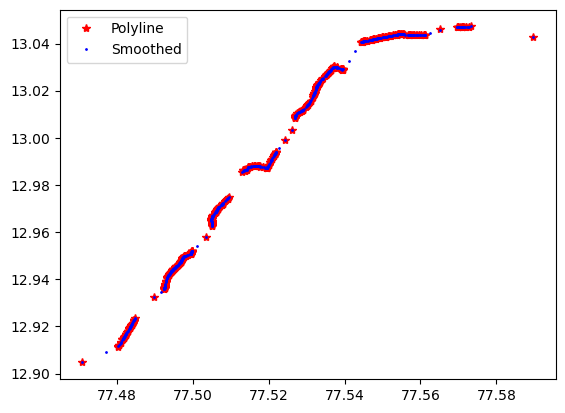

In [1012]:
import matplotlib.pyplot as plt
x, y = zip(*coords)
smooth_x, smooth_y = zip(*smoothed_coords)

plt.plot(y, x, 'r*', label='Polyline')
plt.plot(smooth_y, smooth_x, 'bo', markersize=1,label='Smoothed')
plt.legend()
plt.show()

---

Questions: Did we manually get the polylines for each route in bangalore? If not, how did we get that? 

This will help to come up with idea for splitting into road segments

---

In [469]:
import requests

In [470]:
def snap_to_road(lat, lon, num=1):
    osrm_matching_url = "http://router.project-osrm.org/nearest/v1/driving/{lon},{lat}?number={num}"
    response = requests.get(osrm_matching_url.format(lat=lat, lon=lon, num=num))
    waypoints = response.json()['waypoints']
    final = []
    for waypoint in waypoints:
        final.append((waypoint['location'][::-1], waypoint['distance']))
    return(final)

In [190]:
%%time

snap_to_road(13.0473, 77.58, num=3)

CPU times: user 4.65 ms, sys: 5.29 ms, total: 9.94 ms
Wall time: 315 ms


[([13.047218, 77.579941], 11.102050902),
 ([13.047294, 77.57983], 18.452503651),
 ([13.047128, 77.579864], 24.077329564)]

In [545]:
%%time

snapped_coords = []
for coord in smoothed_coords:
    lat, lon = coord
    loc = snap_to_road(lat, lon)
    snapped_coords.append((loc[0][0][0], loc[0][0][1]) if loc else None)
snapped_coords[:15]

CPU times: user 2.73 s, sys: 851 ms, total: 3.58 s
Wall time: 4min 50s


[(13.042793, 77.589661),
 (13.04721, 77.573391),
 (13.047198, 77.572903),
 (13.047172, 77.572424),
 (13.047159, 77.572188),
 (13.047136, 77.571788),
 (13.047117, 77.571461),
 (13.047102, 77.571214),
 (13.047093, 77.571071),
 (13.047091, 77.571031),
 (13.047089, 77.570998),
 (13.047085, 77.570928),
 (13.047082, 77.570874),
 (13.04707, 77.570678),
 (13.047053, 77.570391)]

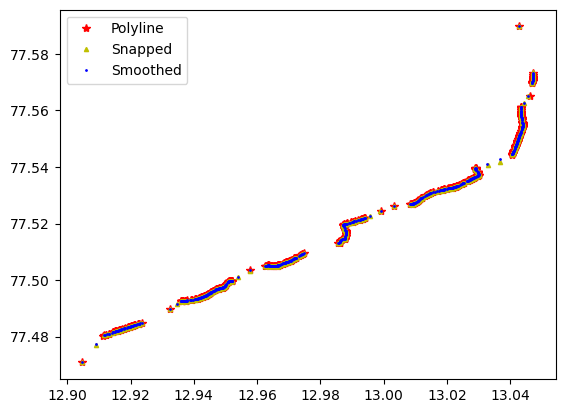

In [546]:
x, y = zip(*coords)
smooth_x, smooth_y = zip(*smoothed_coords)
snap_x, snap_y = zip(*snapped_coords)

plt.plot(x, y, 'r*', label='Polyline')
plt.plot(snap_x, snap_y, 'y^', markersize=3,label='Snapped')
plt.plot(smooth_x, smooth_y, 'bo', markersize=1, label='Smoothed')
plt.legend()
plt.show()

## Splitting into road segments

In [344]:
calc_angle([1, 2], [3, 4])

10.304846468766044

In [551]:
def split_polyline(polyline, angle_threshold=20):
    res = []
    current = [polyline[0]]
    for i in range(1, len(polyline) - 2):
        # print(f"{i}: ", end='') 
        if (polyline[i] == polyline[i - 1] or polyline[i] == polyline[i + 1]):
            current.append(polyline[i])
            continue
        vec1 = (polyline[i][0] - polyline[i - 1][0], polyline[i][1] - polyline[i - 1][1])
        # print(vec1)
        vec2 = (polyline[i + 1][0] - polyline[i][0], polyline[i + 1][1] - polyline[i][1])
        # print(vec2)
        # vec3 = (polyline[i + 2][0] - polyline[i + 1][0], polyline[i + 2][1] - polyline[i + 1][1])
        angle1 = calc_angle(vec1, vec2)
        # angle2 = calc_angle(vec2, vec3)
        current.append(polyline[i])
        
        if angle1 > angle_threshold:  
            res.append(current)
            current = [polyline[i]]

    current.append(polyline[-1])
    res.append(current)
    return res 

In [564]:
segments = split_polyline(snapped_coords, angle_threshold=7)

In [567]:
for i in segments[1]:
    print(f"{i[0]} {i[1]}")

13.04721 77.573391
13.047198 77.572903
13.047172 77.572424
13.047159 77.572188
13.047136 77.571788
13.047117 77.571461
13.047102 77.571214
13.047093 77.571071
13.047091 77.571031
13.047089 77.570998
13.047085 77.570928
13.047082 77.570874
13.04707 77.570678
13.047053 77.570391
13.047039 77.570138
13.047015 77.56994
13.047004 77.569866
13.046983 77.569711
13.04696 77.569544


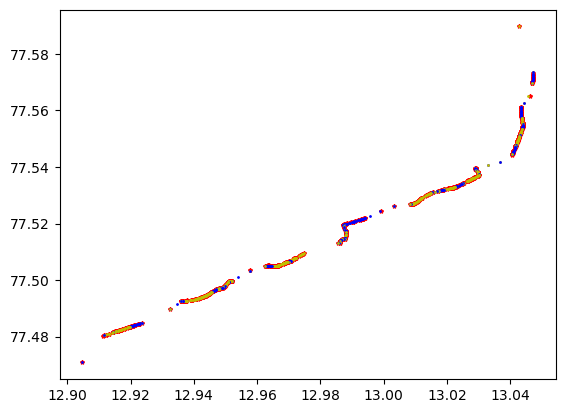

In [566]:
x, y = zip(*coords)
plt.plot(x, y, 'r*', markersize=3)
for i, segment in enumerate(segments):
    col = 'yo'
    if i % 2:
        col = 'bo'
    coord_x, coord_y = zip(*segment)
    plt.plot(coord_x, coord_y, col, markersize=1)

In [539]:
segments[0]

[(13.042793, 77.589661), (13.04721, 77.573391)]

---

Apparently OSM has tags for whether a road is a highway or not. Although some people have spoken about how it's not possible to make a genralized splitting algorithm for that data. 

Still looking for ways to segment polyline that has been made already and put on the internet somewhere

---

# OSMnx testing

In [579]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 2.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 1.0 MB/s eta 0:00:00eta 0:00:01


In [580]:
import osmnx as ox

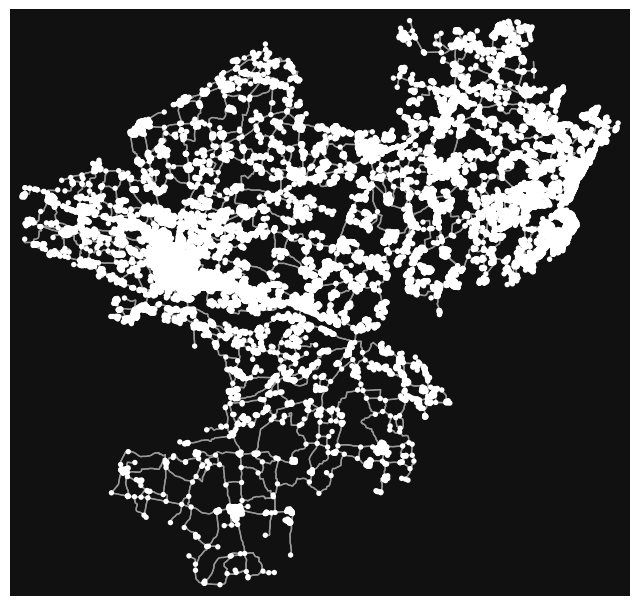

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [589]:
ox.plot_graph(ox.graph_from_place('Kanchipuram, India', network_type='drive'))

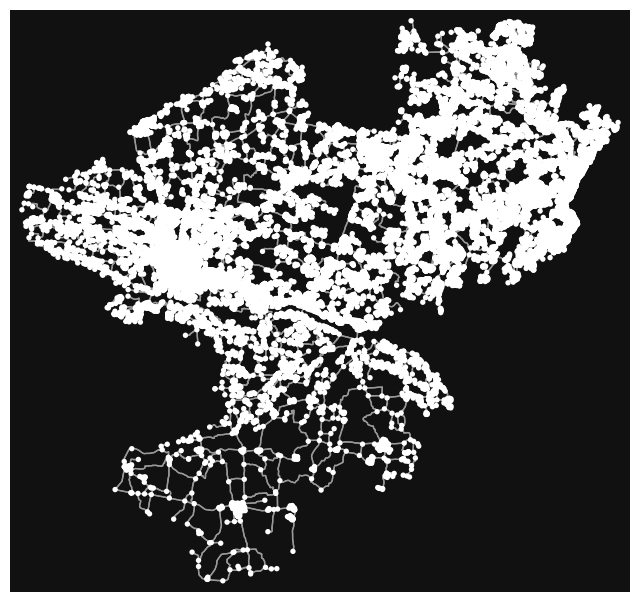

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [590]:
ox.plot_graph(ox.graph_from_place('Kanchipuram, India'))

In [941]:
graph = ox.graph_from_place('Kanchipuram, India', which_result=1, network_type='drive')

In [942]:
graph_bang = ox.graph_from_place('Bangalore, India', which_result=1, network_type='drive')

In [661]:
graph

In [593]:
graph.graph

{'created_date': '2025-01-16 12:24:24',
 'created_with': 'OSMnx 2.0.1',
 'crs': 'epsg:4326',
 'simplified': True}

In [692]:
i = 0
for n, nbrsdict in graph.adjacency():
    print(f"\n{n}")
    for nbr, keydict in nbrsdict.items():
        for key, eattr in keydict.items():
            print(f"\t{eattr}")
    i += 1
    if (i == 1000):
        break


245608206
	{'osmid': 22832406, 'highway': 'primary', 'name': 'Kancheepuram - Vandavasi Road', 'ref': 'SH116', 'oneway': False, 'reversed': False, 'length': 2486.864087739933, 'geometry': <LINESTRING (79.647 12.63, 79.653 12.637, 79.653 12.638, 79.653 12.64, 79.65...>}
	{'osmid': 688739720, 'highway': 'primary', 'lanes': '2', 'name': 'Bukkathurai - Uthiramerur Road', 'ref': 'SH118', 'oneway': False, 'reversed': False, 'length': 1572.9451505300067, 'geometry': <LINESTRING (79.647 12.63, 79.647 12.63, 79.655 12.629, 79.661 12.628)>}

245610941
	{'osmid': 832908782, 'highway': 'primary', 'name': 'Kancheepuram - Vandavasi Road', 'ref': 'SH116', 'oneway': False, 'reversed': False, 'length': 58.09960866988747}
	{'osmid': 832908782, 'highway': 'primary', 'name': 'Kancheepuram - Vandavasi Road', 'ref': 'SH116', 'oneway': False, 'reversed': True, 'length': 45.43628287198798}
	{'osmid': 32761612, 'highway': 'tertiary', 'name': 'Vilakkadi Koil Street', 'oneway': False, 'reversed': True, 'length':

In [646]:
i = 0
for u, v, keys, data in graph.edges(data="name", keys=True):
    print(f"{u}, {v}, {keys}, {data}")
    i += 1
    if (i == 10):
        break

245608206, 4657483844, 0, Kancheepuram - Vandavasi Road
245608206, 11402683159, 0, Bukkathurai - Uthiramerur Road
245610941, 7775372716, 0, Kancheepuram - Vandavasi Road
245610941, 2407611861, 0, Kancheepuram - Vandavasi Road
245610941, 368979864, 0, Vilakkadi Koil Street
245616392, 7719971859, 0, Thandalam - Perambakkam - Thakkolam - Arugilpadi Road
245616392, 3874393084, 0, Thandalam - Perambakkam - Thakkolam - Arugilpadi Road
245616392, 7719971835, 0, Prayanguppam Road
245616740, 7779991500, 0, Singaperumalkoil - Sriperumbudur - Thiruvallur - Red Hills Road
247329280, 7822241184, 0, None


In [598]:
245608206 in graph

True

In [600]:
22832406 in graph

False

In [644]:
graph.edges(list(graph.nodes)[0])

OutMultiEdgeDataView([(245608206, 4657483844), (245608206, 11402683159)])

In [645]:
graph.nodes[4657483844]

{'y': 12.650268, 'x': 79.6548254, 'street_count': 3}

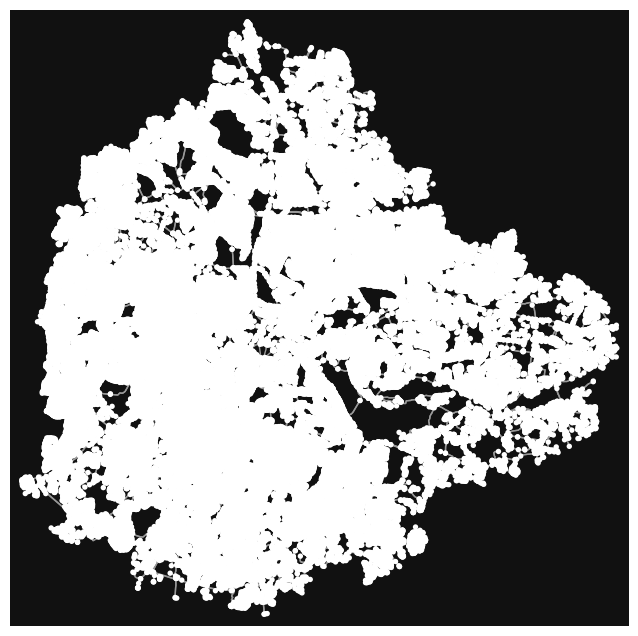

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [943]:
ox.plot_graph(graph_bang)

In [944]:
ox.nearest_edges(graph_bang, 77.58966, 13.0428)

(3735711204, 430127772, 0)

In [949]:
graph_bang.edges[3735711204, 430127772, 0]

{'osmid': 369786367,
 'highway': 'trunk',
 'lanes': '3',
 'maxspeed': '60',
 'name': 'Outer Ring Road',
 'oneway': True,
 'ref': 'NH75',
 'reversed': False,
 'length': 362.05541906120476,
 'geometry': <LINESTRING (77.59 13.043, 77.59 13.043, 77.59 13.043, 77.59 13.043, 77.59 1...>}

In [950]:
for n, nbrdict in graph_bang.adjacency():
    if n == 12401455468:
        print(nbrdict)

{3868574353: {0: {'osmid': 383579363, 'highway': 'residential', 'oneway': False, 'reversed': False, 'length': 89.75605397567696}}, 3868574356: {0: {'osmid': 383579363, 'highway': 'residential', 'oneway': False, 'reversed': True, 'length': 134.27216116485832}}, 12401455470: {0: {'osmid': 1340688342, 'highway': 'residential', 'oneway': False, 'reversed': False, 'length': 34.20384711535418, 'geometry': <LINESTRING (77.493 13.071, 77.493 13.071, 77.493 13.071)>}}}


---

Clearly nodes in hebbal are part of the bangalore network as well

---

In [954]:
graph_bang.nodes[3826215062]

{'y': 13.0472124, 'x': 77.5734854, 'street_count': 3}

In [766]:
graph_heb.nodes[3826215062]

{'y': 13.0472124, 'x': 77.5734854, 'street_count': 3}

In [1307]:
lons = np.array([])
lats = np.array([])
for lat, lon in coords:
    lons = np.append(lons, lon)
    lats = np.append(lats, lat)

In [1308]:
edges = ox.nearest_edges(graph_bang, lons, lats)

In [1309]:
edges

array([(3735711204, 430127772, 0), (3826215062, 5392857471, 0),
       (3826215062, 5392857471, 0), (3826215062, 5392857471, 0),
       (3826215062, 5392857471, 0), (3826215062, 5392857471, 0),
       (3826215062, 5392857471, 0), (3826215062, 5392857471, 0),
       (3826215062, 5392857471, 0), (3826215062, 5392857471, 0),
       (3826215062, 5392857471, 0), (3826215062, 5392857471, 0),
       (5392857471, 2446005991, 0), (5392857471, 2446005991, 0),
       (5392857471, 2446005991, 0), (5392857471, 2446005991, 0),
       (5392857471, 2446005991, 0), (5392857471, 2446005991, 0),
       (5392857471, 2446005991, 0), (5392857471, 2446005991, 0),
       (5392857471, 2446005991, 0), (11554370596, 11554370597, 0),
       (11554370596, 11554370597, 0), (11554370596, 11554370597, 0),
       (11554370597, 1078399174, 0), (11554370597, 1078399174, 0),
       (1078399174, 1078399184, 0), (1078399174, 1078399184, 0),
       (1078399174, 1078399184, 0), (1078399174, 1078399184, 0),
       (1078399174

In [1310]:
from itertools import groupby
clean_edges = [key for key, _group in groupby(edges)]

In [1311]:
clean_edges

[(3735711204, 430127772, 0),
 (3826215062, 5392857471, 0),
 (5392857471, 2446005991, 0),
 (11554370596, 11554370597, 0),
 (11554370597, 1078399174, 0),
 (1078399174, 1078399184, 0),
 (1078399184, 7228151803, 0),
 (11554370600, 7228151803, 0),
 (521144442, 11554370601, 0),
 (11554370601, 1078399170, 0),
 (1078399170, 521144460, 0),
 (521144460, 521144462, 0),
 (521144462, 11121238977, 0),
 (11121238977, 598947971, 0),
 (598947971, 598947970, 0),
 (598947970, 521144224, 0),
 (521144224, 598947959, 0),
 (598947959, 598947960, 0),
 (598947960, 10023216324, 0),
 (10023216324, 598947945, 0),
 (598947945, 598947942, 0),
 (598947945, 598947939, 0),
 (598947939, 11601696870, 0),
 (10039201707, 9187809775, 0),
 (10175102591, 10039201707, 0),
 (598947939, 11601696870, 0),
 (11601696870, 2446079578, 0),
 (11601696870, 12260709162, 0),
 (11601696870, 2446079578, 0),
 (12186265887, 11921336863, 0),
 (12186265888, 308071911, 0),
 (12186265887, 11921336863, 0),
 (12186265888, 308071911, 0),
 (12186265

In [1312]:
cleaned_edges = []
for elem in clean_edges:
    cleaned_edges.append(elem[0])
    # cleaned_edges.append(elem[1])

In [1313]:
cleaned_edges

[3735711204,
 3826215062,
 5392857471,
 11554370596,
 11554370597,
 1078399174,
 1078399184,
 11554370600,
 521144442,
 11554370601,
 1078399170,
 521144460,
 521144462,
 11121238977,
 598947971,
 598947970,
 521144224,
 598947959,
 598947960,
 10023216324,
 598947945,
 598947945,
 598947939,
 10039201707,
 10175102591,
 598947939,
 11601696870,
 11601696870,
 11601696870,
 12186265887,
 12186265888,
 12186265887,
 12186265888,
 12186265887,
 11921336863,
 463392781,
 463392823,
 463392823,
 463392814,
 463392819,
 463392809,
 463392802,
 10039201630,
 463392784,
 308071900,
 11886100897,
 11886114678,
 463429500,
 9366790018,
 11888304865,
 9363763133,
 1559233384,
 1559233238,
 1559233119,
 10001174201,
 10003492075,
 1559233137,
 10003492074,
 574576209,
 11873481254,
 574572417,
 2447900539,
 6894425992,
 11840602022,
 2227256998,
 10063886288,
 1719192238,
 11873385864,
 1719191859,
 1719191867,
 4697257910,
 1719192192,
 10841365761,
 10841365763,
 10841365760,
 10841365770,
 108

In [1314]:
temp = [key for key, _group in groupby(cleaned_edges)]
cleaner_edges = list(dict.fromkeys(temp))

In [1315]:
cleaner_edges

[3735711204,
 3826215062,
 5392857471,
 11554370596,
 11554370597,
 1078399174,
 1078399184,
 11554370600,
 521144442,
 11554370601,
 1078399170,
 521144460,
 521144462,
 11121238977,
 598947971,
 598947970,
 521144224,
 598947959,
 598947960,
 10023216324,
 598947945,
 598947939,
 10039201707,
 10175102591,
 11601696870,
 12186265887,
 12186265888,
 11921336863,
 463392781,
 463392823,
 463392814,
 463392819,
 463392809,
 463392802,
 10039201630,
 463392784,
 308071900,
 11886100897,
 11886114678,
 463429500,
 9366790018,
 11888304865,
 9363763133,
 1559233384,
 1559233238,
 1559233119,
 10001174201,
 10003492075,
 1559233137,
 10003492074,
 574576209,
 11873481254,
 574572417,
 2447900539,
 6894425992,
 11840602022,
 2227256998,
 10063886288,
 1719192238,
 11873385864,
 1719191859,
 1719191867,
 4697257910,
 1719192192,
 10841365761,
 10841365763,
 10841365760,
 10841365770,
 10841365771,
 10841365772,
 1533670576,
 10039378322,
 1533670492,
 1533670505,
 9622748389,
 9622748385,
 20

In [1620]:
import math
cleanest_edges = []
# swap = False
# i = 0
# percentage = 40
# num = math.floor((percentage * len(cleaner_edges) / 100)) 
# split = len(cleaner_edges) // num
# for i in range(num):
#     cleanest_edges.append(cleaner_edges[i])
# cleanest_edges.append(cleaner_edges[-1])

# for elem in cleaner_edges[::15]:
#     cleanest_edges.append(elem)

halfway = len(cleaner_edges) // 5

for elem in cleaner_edges[:halfway:3]:
    cleanest_edges.append(elem)
for elem in cleaner_edges[halfway::10]:
    cleanest_edges.append(elem)

# for elem in cleaner_edges[::2]:
#     cleanest_edges.append(elem)

if cleanest_edges[-1] != cleaner_edges[-1]:
    cleanest_edges.append(cleaner_edges[-1])

In [1621]:
cleanest_edges

[3735711204,
 11554370596,
 1078399184,
 11554370601,
 521144462,
 598947970,
 598947960,
 598947939,
 11601696870,
 11921336863,
 463392823,
 463429500,
 10003492074,
 11873385864,
 10841365772,
 62053496,
 11536092346,
 10081235825,
 1625434163,
 1285970740,
 4813269390,
 7466393546,
 9994142354]

In [1622]:
final_edges = []
for i in range(len(cleanest_edges) - 1):
    final_edges.extend(ox.shortest_path(graph_bang, cleanest_edges[i], cleanest_edges[i + 1])[:-1])
final_edges.append(cleanest_edges[-1])

In [1623]:
final_edges

[3735711204,
 430127772,
 6905012676,
 2578344262,
 3826215062,
 5392857471,
 2446005991,
 11846079603,
 11554370596,
 11554370597,
 1078399174,
 1078399184,
 11554370600,
 11554370601,
 1078399170,
 521144460,
 521144462,
 11121238977,
 598947971,
 598947970,
 521144224,
 598947959,
 598947960,
 10023216324,
 598947945,
 598947939,
 11601696870,
 2446079578,
 11964711936,
 11964711938,
 12186265888,
 308071911,
 11921336863,
 463392781,
 463392823,
 463392814,
 463392819,
 463392809,
 463392802,
 10039201630,
 463392784,
 308071900,
 11886114678,
 463429500,
 9366790018,
 10001174201,
 10003492074,
 11873481254,
 2447900544,
 2447900543,
 6894425992,
 10003592449,
 11840602022,
 11873417058,
 1719191836,
 1719192238,
 11873385864,
 1719191857,
 1719191859,
 1719191867,
 4697257910,
 4692331556,
 10841365760,
 10841365761,
 10841365762,
 10841365763,
 10841365764,
 10841365765,
 10841365768,
 10841365770,
 10841365771,
 10841365772,
 10841365774,
 1533670576,
 1533670492,
 1533670508,


In [1624]:
finalized_coords = []
for i in final_edges:
    finalized_coords.append((graph_bang.nodes[i]['y'], graph_bang.nodes[i]['x']))
    print(f'{i}, {graph_bang.nodes[i]}')

3735711204, {'y': 13.0427518, 'x': 77.5901426, 'street_count': 3}
430127772, {'y': 13.042807, 'x': 77.5868557, 'street_count': 3}
6905012676, {'y': 13.0428593, 'x': 77.5866219, 'street_count': 3}
2578344262, {'y': 13.0475592, 'x': 77.5786603, 'street_count': 3}
3826215062, {'y': 13.0472124, 'x': 77.5734854, 'street_count': 3}
5392857471, {'y': 13.0470867, 'x': 77.5709652, 'street_count': 3}
2446005991, {'y': 13.0445196, 'x': 77.5626544, 'street_count': 3}
11846079603, {'y': 13.0436438, 'x': 77.5615069, 'street_count': 3}
11554370596, {'y': 13.0435554, 'x': 77.5613062, 'street_count': 4}
11554370597, {'y': 13.0435078, 'x': 77.5611426, 'street_count': 4}
1078399174, {'y': 13.0434896, 'x': 77.560919, 'street_count': 3}
1078399184, {'y': 13.0436198, 'x': 77.5572975, 'street_count': 3}
11554370600, {'y': 13.0436636, 'x': 77.5570612, 'street_count': 4}
11554370601, {'y': 13.0436809, 'x': 77.5568978, 'street_count': 4}
1078399170, {'y': 13.0440194, 'x': 77.5546408, 'street_count': 4}
52114446

In [1625]:
print(ox.shortest_path(graph_bang, 5392857471, 2446079578))

[5392857471, 2446005991, 1078399170, 521144460, 521144462, 11121238977, 598947971, 598947970, 521144224, 598947959, 598947960, 10023216324, 598947945, 598947939, 11601696870, 2446079578]


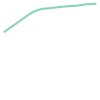

In [1626]:
graph_bang.edges[(5392857471, 2446005991, 0)]['geometry']

In [1627]:
encoded_finalized = pl.encode(finalized_coords)
print(encoded_finalized)

elrnAkiqxMKnSIn@k\vp@dAh_@VvN`O~r@nDbFNf@H`@Bj@YrUGn@C^cAbMh@jDVpAn@nC`AjEh@bCDRR~@TbATfAt@hDl@bCvAdFjx@dg@tTlCXPKVeHlONHtGxCfCjA|@b@bAb@l@X~@d@l@X~@d@jHnDFBpEnBzBbAxYtFbIzAx_@~M|VtMt^tBbYjKtPdGlDtAjLdE~JjCv@IbB\~M`DjAXhAXRFWz@CJJVk@fCQn@cAhDU|@OhBNdBXdAn@~BPbBlDTpArAt@n@XPVJVFj@DTBr@BD@X@`@BP@`@DZ@ZBVBZ@`@B`AH`AJrDTfFXzALUnB|AT`Dr@hEz@fG~GlB\|Dz@rGjBfMvGl@Z~EbD`DdAb@Lv@Rv@RzBr@fA^lDtA`Cv@JB|K\dGWhOdCNFxP|Eva@nTHBjLpJ|BbBpA`@~Bb@n@Px@N~@Rv@Xb@Tv@b@hEbCZPfAt@v@d@n@^~@`@^TbBv@nDxApA`@tA`@bAVlCt@zG|@pAJ~In@jCTrAPn@FzBPv@PfGhCb@Pb@TnBtMUvCHLhDhAxKzBh@LfCn@p@PXHtA^r@Rz@Pv@Tv@Rv@RrCr@x@TtA`@~@Xj@PND|Bp@rFtAlAXlEfAhAXbAX~@VdATl@N`AV`AZrFzAjFtAV_AW~@~F~A`EfAxLnDrG~A~ACPEtJ`P^hAxChFfEfP


## Testing the polylines on graph

---

Original coordinates from polyline

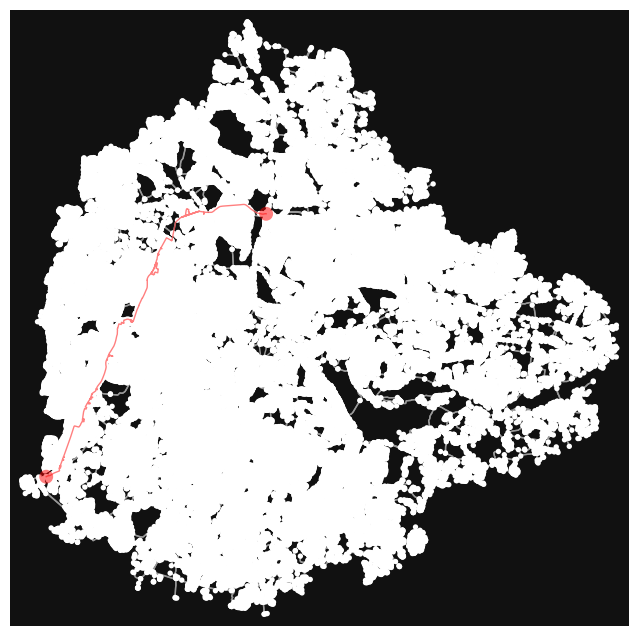

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [1216]:
ox.plot_graph_route(graph_bang, final_edges, route_linewidth=1)

---

Snapped OSRM coordinates of polyline

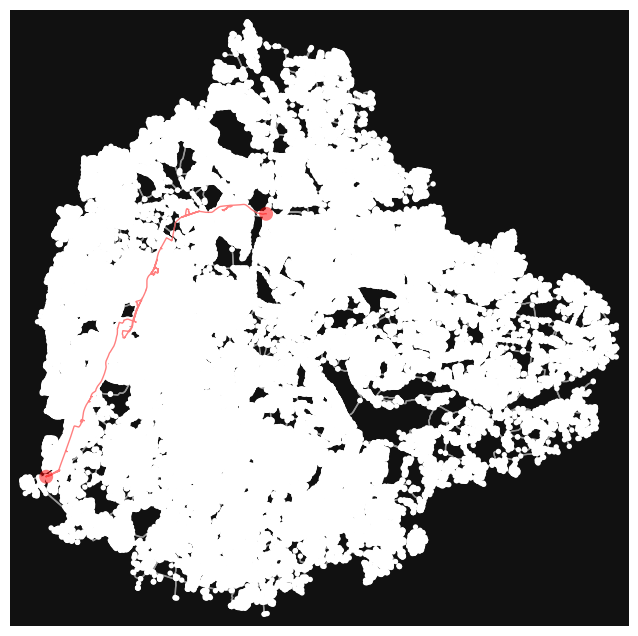

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [1200]:
ox.plot_graph_route(graph_bang, final_edges, route_linewidth=1)

---

Dropped alternate nodes

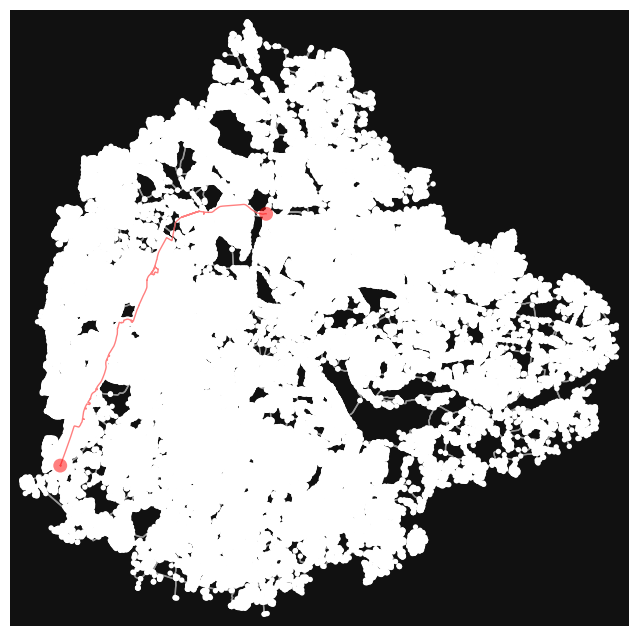

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [1325]:
ox.plot_graph_route(graph_bang, final_edges, route_linewidth=1)

---

Every third node

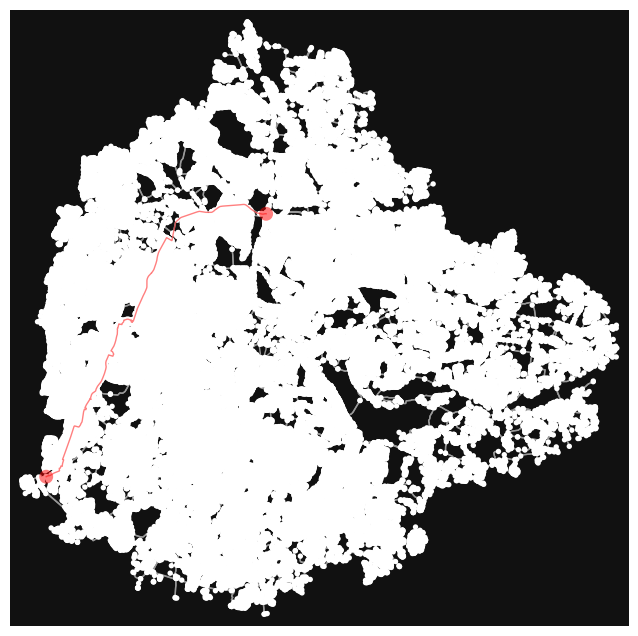

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [1332]:
ox.plot_graph_route(graph_bang, final_edges, route_linewidth=1)

---

Every fourth node

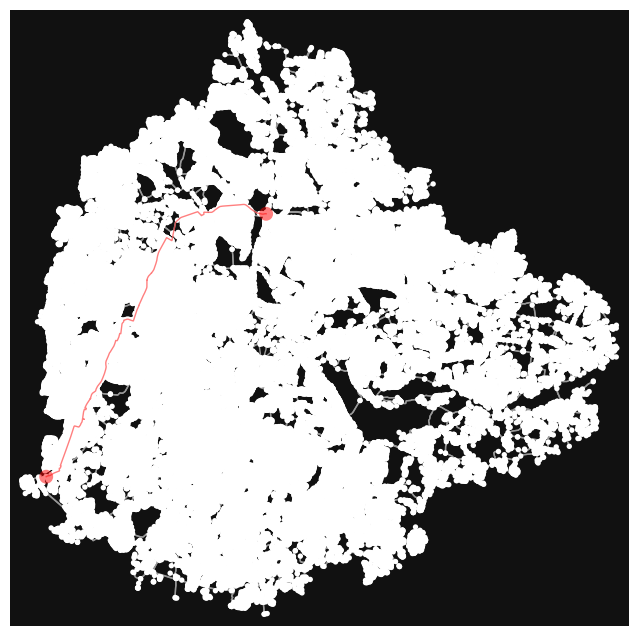

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [1338]:
ox.plot_graph_route(graph_bang, final_edges, route_linewidth=1)

---

Every seventh node

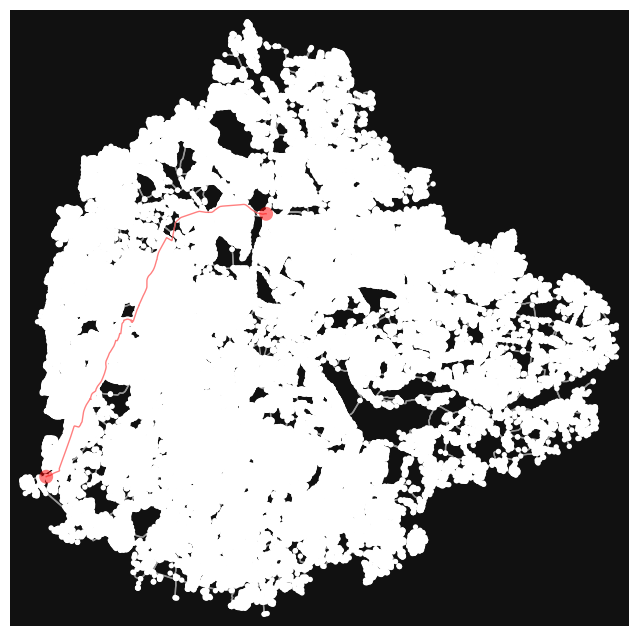

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [1401]:
ox.plot_graph_route(graph_bang, final_edges, route_linewidth=1)

---

Every tenth node

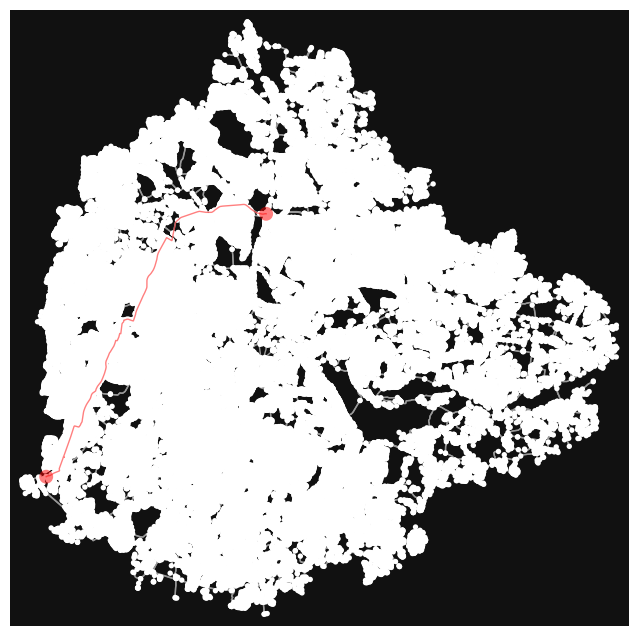

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [1449]:
ox.plot_graph_route(graph_bang, final_edges, route_linewidth=1)

---

Every 15th node

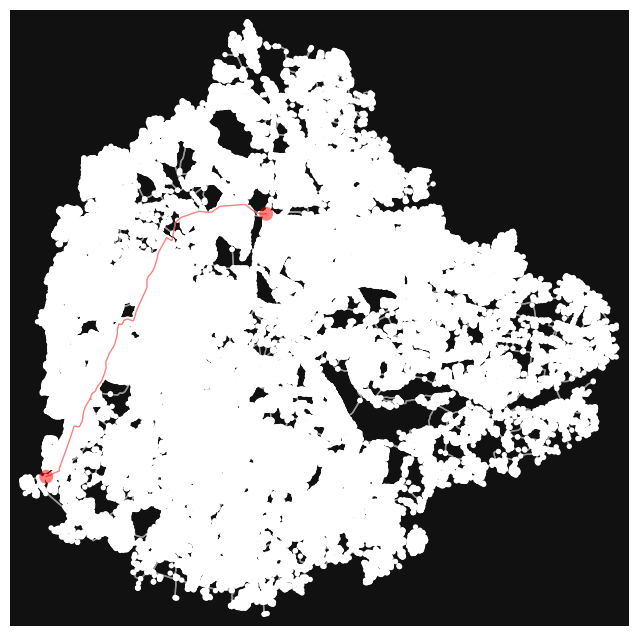

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [1505]:
ox.plot_graph_route(graph_bang, final_edges, route_linewidth=1)

---

First fifth every 3rd node, rest every 10th node

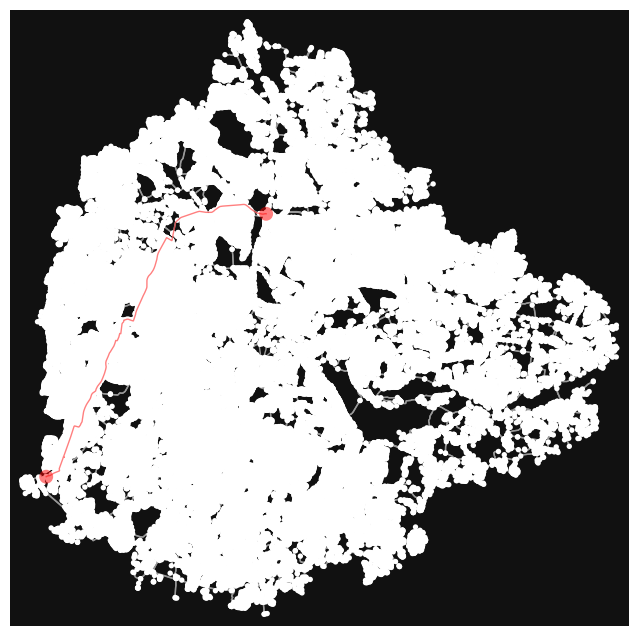

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [1587]:
ox.plot_graph_route(graph_bang, final_edges, route_linewidth=1)

---

40% of the nodes

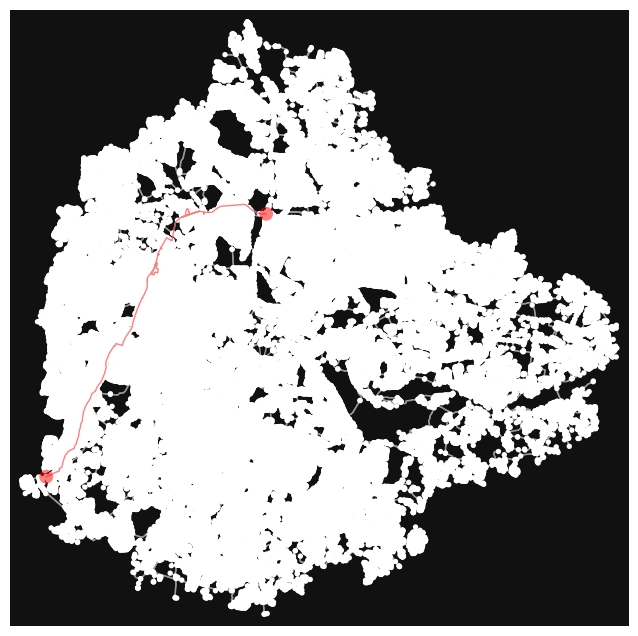

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [1486]:
ox.plot_graph_route(graph_bang, final_edges, route_linewidth=1)

---

Using the edge LineStrings

In [1305]:
geom_route = []
for edge in clean_edges:
    geom_route.extend(graph_bang.edges[edge]['geometry'])

TypeError: 'LineString' object is not iterable

---

Try to get linestrings from the edge geometry directly. This could still lead to similar issue since some of the nearest edges are not on the actual route itself. 

Need to figure out some way to reliably split a polyline route into segments and also have those segments be easy to access for training later.

---

In [1219]:
graph_heb = ox.graph_from_address('Hebbal, Karnataka, India', dist=10000, network_type='drive')

---

## GDFS

---

In [1047]:
nodes_bang, edges_bang = ox.graph_to_gdfs(graph_bang)

In [1048]:
nodes_bang

,y,x,street_count,highway,junction,ref,geometry
osmid,,,,,,,
17327095,12.910542,77.598721,4,NaN,NaN,NaN,POINT (77.59872 12.91054)
17327139,12.934965,77.624072,3,NaN,NaN,NaN,POINT (77.62407 12.93497)
17327141,12.938493,77.629168,3,NaN,NaN,NaN,POINT (77.62917 12.93849)
17327420,13.095224,77.594178,3,traffic_signals,NaN,NaN,POINT (77.59418 13.09522)
17327433,12.985951,77.579325,3,NaN,NaN,NaN,POINT (77.57932 12.98595)
...,...,...,...,...,...,...,...
12518058757,12.934990,77.619797,3,NaN,NaN,NaN,POINT (77.6198 12.93499)
12518097722,12.969876,77.705906,1,NaN,NaN,NaN,POINT (77.70591 12.96988)
12518114090,12.869992,77.525398,3,NaN,NaN,NaN,POINT (77.5254 12.86999)


In [961]:
for i in graph_bang.neighbors(12229802215):
    print(i)

12229802214
5354313585


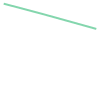

In [962]:
graph_bang.edges[(12506572909, 12506572907, 0)]['geometry']

In [963]:
graph_bang.nodes[17327095]

{'y': 12.9105419, 'x': 77.5987208, 'street_count': 4}

In [1267]:
nodes_bang.loc[nodes_bang['street_count'] <= 1]

,y,x,street_count,highway,junction,ref,geometry
osmid,,,,,,,
248003859,12.955713,77.604720,1,NaN,NaN,NaN,POINT (77.60472 12.95571)
248462898,12.964383,77.601593,1,NaN,NaN,NaN,POINT (77.60159 12.96438)
248550897,12.960058,77.604361,1,NaN,NaN,NaN,POINT (77.60436 12.96006)
248800714,12.904647,77.522425,1,NaN,NaN,NaN,POINT (77.52242 12.90465)
248839372,12.916819,77.501133,1,NaN,NaN,NaN,POINT (77.50113 12.91682)
...,...,...,...,...,...,...,...
12509749118,12.939266,77.745866,1,NaN,NaN,NaN,POINT (77.74587 12.93927)
12511687071,12.939332,77.747127,1,NaN,NaN,NaN,POINT (77.74713 12.93933)
12512141309,13.064169,77.617713,1,NaN,NaN,NaN,POINT (77.61771 13.06417)


---

All edges in this dataset have some kind of geometry. Unsure on how many of them are unique though

---

In [1050]:
edges_bang

osmid        highway lanes  \
u           v           key                                    
17327095    248007842   0      32261256    residential     2   
            5354313543  0    1166304118    residential   NaN   
            305154531   0    1166304119      secondary     2   
17327139    443224605   0     111814615        primary     2   
            309593057   0      28186701    residential   NaN   
...                                 ...            ...   ...   
12518114090 12518114092 1    1352896192  tertiary_link   NaN   
12518114092 1587053389  0     791281530       tertiary   NaN   
            12518114090 0     791281530       tertiary   NaN   
                        1    1352896192  tertiary_link   NaN   
12520325514 7486353176  0     800454721    residential   NaN   

                                             name  oneway reversed  \
u           v           key                                          
17327095    248007842   0           2nd Main Road    True    False   
            5354313543  0           2nd Main Road   False     True   
            305154531   0          9th Cross Road    True    False   
17327139    443224605   0    Mahayogi Vemana Road    True    False   
            309593057   0          7th Cross Road   False    False   
...                                           ...     ...      ...   
12518114090 12518114092 1                     NaN   False     True   
12518114092 1587053389  0                     NaN   False    False   
            12518114090 0                     NaN   False     True   
                        1                     NaN   False    False   
12520325514 7486353176  0                     NaN   False    False   

                                 length  \
u           v           key               
17327095    248007842   0    244.091315   
            5354313543  0      5.961520   
            305154531   0     29.723619   
17327139    443224605   0     44.630750   
            309593057   0     50.303992   
...                                 ...   
12518114090 12518114092 1     26.009867   
12518114092 1587053389  0      5.095521   
            12518114090 0     34.325396   
                        1     26.009867   
12520325514 7486353176  0     17.014810   

                                                                      geometry  \
u           v           key                                                      
17327095    248007842   0    LINESTRING (77.59872 12.91054, 77.59848 12.91272)   
            5354313543  0    LINESTRING (77.59872 12.91054, 77.59873 12.91049)   
            305154531   0    LINESTRING (77.59872 12.91054, 77.59899 12.91056)   
17327139    443224605   0    LINESTRING (77.62407 12.93497, 77.62437 12.93524)   
            309593057   0    LINESTRING (77.62407 12.93497, 77.62402 12.935...   
...                                                                        ...   
12518114090 12518114092 1    LINESTRING (77.5254 12.86999, 77.52554 12.8700...   
12518114092 1587053389  0    LINESTRING (77.52561 12.8701, 77.52561 12.8701...   
            12518114090 0    LINESTRING (77.52561 12.8701, 77.52561 12.87, ...   
                        1    LINESTRING (77.52561 12.8701, 77.52554 12.8700...   
12520325514 7486353176  0    LINESTRING (77.54774 12.89682, 77.54781 12.89696)   

                            maxspeed  ref bridge width access junction tunnel  \
u           v           key                                                     
17327095    248007842   0        NaN  NaN    NaN   NaN    NaN      NaN    NaN   
            5354313543  0        NaN  NaN    NaN   NaN    NaN      NaN    NaN   
            305154531   0        NaN  NaN    NaN   NaN    NaN      NaN    NaN   
17327139    443224605   0        NaN  NaN    NaN   NaN    NaN      NaN    NaN   
            309593057   0        NaN  NaN    NaN   NaN    NaN      NaN    NaN   
...                              ...  ...    ...   ...    ...      ...    ...   
12518114090 125

---

Edge can have multiple (u, v) pairs and change geometry even with the same osmid

---

In [1051]:
edges_bang.loc[edges_bang['osmid']== 369786367]

,,,osmid,highway,lanes,name,oneway,reversed,length,geometry,maxspeed,ref,bridge,width,access,junction,tunnel,est_width,area,service
u,v,key,,,,,,,,,,,,,,,,,,
430127772,6905012676,0,369786367,trunk,3,Outer Ring Road,True,False,25.985819,"LINESTRING (77.58686 13.04281, 77.58662 13.04286)",60,NH75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3735711204,430127772,0,369786367,trunk,3,Outer Ring Road,True,False,362.055419,"LINESTRING (77.59014 13.04275, 77.59008 13.042...",60,NH75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1290]:
edges_bang.loc[(17327139, 443224605, 0)]

osmid                                                111814615
highway                                                primary
lanes                                                        2
name                                      Mahayogi Vemana Road
oneway                                                    True
reversed                                                 False
length                                                44.63075
geometry     LINESTRING (77.6240716 12.9349653, 77.6243708 ...
maxspeed                                                   NaN
ref                                                        NaN
bridge                                                     NaN
width                                                      NaN
access                                                     NaN
junction                                                   NaN
tunnel                                                     NaN
est_width                                              

---

For segments that we have little to no info, we can probably assume the segment is small enough to not impact the overall traffic, and thus can be discarded/or assumed to be a default traffic level (free).

---

In [1288]:
len(edges_bang)

387509

In [1295]:
list(graph_bang.edges)   # This is just a list of edges in the graph, but it's only the keys. No actual details. Rest of it is on the geodataframe

[(17327095, 248007842, 0),
 (17327095, 5354313543, 0),
 (17327095, 305154531, 0),
 (17327139, 443224605, 0),
 (17327139, 309593057, 0),
 (17327141, 956271706, 0),
 (17327141, 956271740, 0),
 (17327420, 10185134633, 0),
 (17327420, 2451336631, 0),
 (17327433, 578121591, 0),
 (17327433, 10279595643, 0),
 (17327433, 429286716, 0),
 (26529532, 6453574897, 0),
 (26529532, 1523536993, 0),
 (26529574, 10093880769, 0),
 (26529574, 12159713456, 0),
 (26529574, 10093887223, 0),
 (26529589, 1843532044, 0),
 (26529589, 287906704, 0),
 (26529606, 12151502520, 0),
 (26529606, 1446114501, 0),
 (60952254, 248459877, 0),
 (60952254, 423784673, 0),
 (60952288, 4294218124, 0),
 (60952288, 248462913, 0),
 (60952290, 247966138, 0),
 (60952290, 248003861, 0),
 (60952294, 10060658633, 0),
 (60952294, 2227971913, 0),
 (60952298, 247958463, 0),
 (60952298, 247958465, 0),
 (60952302, 4294218131, 0),
 (60952302, 459656194, 0),
 (60952302, 62013232, 0),
 (61746203, 7263195946, 0),
 (61746203, 669247515, 0),
 (617

In [1294]:
type(edges_bang)

geopandas.geodataframe.GeoDataFrame

In [1606]:
ox.routing.route_to_gdf(graph_bang, final_edges)

,,,osmid,highway,ref,oneway,reversed,length,access,maxspeed,name,lanes,geometry,bridge,tunnel
u,v,key,,,,,,,,,,,,,
3735711204,430127772,0,369786367,trunk,NH75,True,False,362.055419,NaN,60,Outer Ring Road,3,"LINESTRING (77.59014 13.04275, 77.59008 13.042...",NaN,NaN
430127772,6905012676,0,369786367,trunk,NH75,True,False,25.985819,NaN,60,Outer Ring Road,3,"LINESTRING (77.58686 13.04281, 77.58662 13.04286)",NaN,NaN
6905012676,2578344262,0,"[1203856418, 369786367]",trunk,NH75,True,False,1021.858018,NaN,"[60, 50]",Outer Ring Road,3,"LINESTRING (77.58662 13.04286, 77.58585 13.043...",NaN,NaN
2578344262,3826215062,0,"[467074985, 467074971, 379326799]",trunk,NH75,True,False,562.823668,NaN,60,Bhadrappa Layout Flyover,3,"LINESTRING (77.57866 13.04756, 77.5783 13.0476...",yes,NaN
3826215062,5392857471,0,379327145,trunk,NH75,True,False,273.403881,NaN,60,Outer Ring Road,3,"LINESTRING (77.57349 13.04721, 77.57274 13.047...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12167700027,1110308938,0,135401453,primary,NaN,False,False,10.646958,NaN,NaN,NaN,NaN,"LINESTRING (77.4802 12.91041, 77.48023 12.91032)",NaN,NaN
1110308938,1487001421,0,"[1288931169, 465135523, 135401454, 135401455]",primary,NaN,True,False,409.688590,NaN,NaN,Kengeri Flyover,NaN,"LINESTRING (77.48023 12.91032, 77.48027 12.910...",viaduct,NaN
1487001421,66666538,0,135401455,primary,NaN,True,False,43.707939,NaN,NaN,NaN,NaN,"LINESTRING (77.4775 12.90845, 77.47733 12.9083...",NaN,NaN
